# Stacionární řešení Poissonovy rovnice v 1D

In [1]:
%pylab inline
plt.rcParams['figure.figsize'] = (8, 6)

Populating the interactive namespace from numpy and matplotlib


Stav, kdy teplotní rozdíl mezi jednotlivými částmi tělesa se v čase nemění t.j.
$\frac{\partial T}{\partial t} = 0$, nazýváme stacionárním vedením tepla.
Rovnice vedení tepla má tvar **Poissonovy rovnice**

$$\frac{{\partial ^2}T}{\partial {x^2}} =  - \frac{H}{\lambda }$$

### Dirichletova a Neumannova okrajová podmínka

Soustava $n$  lineárních rovnic o $n$ neznámých pro řešení Poissonovy rovnice a použití Dirichletovy a Neumannovi podmínky (předepsaná hustota tepelného toku) pro okrajové body, $T_{x_0} = {T_{def}}$ a  $q_{x_{n-1}} = - \lambda  \cdot \frac{\partial T}{\partial x}$.
$$\renewcommand\arraystretch{1.5}\begin{vmatrix}
   1 & 0 & 0 & 0 & 0 & 0  \\
   1 & { - 2} & 1 & 0 & 0 & 0  \\
   0 & 1 & { - 2} & 1 & 0 & 0  \\
    \vdots  &  \vdots  &  \vdots  &  \vdots  &  \vdots  &  \vdots   \\
   0 & 0 & 0 & 1 & { - 2} & 1  \\
   0 & 0 & 0 & 0 & 2 & { - 2}  \\
\end{vmatrix} \cdot \begin{vmatrix}
   {T_{x_0}}  \\
   {T_{x_1}}  \\
   {T_{x_2}}  \\
    \vdots   \\
   {T_{x_{n - 2} }}  \\
   {T_{x_{n-1}}}  \\
\end{vmatrix} = \begin{vmatrix}
   {T_{def}}  \\
   {- \frac{{H \cdot \Delta {x^2}}}{\lambda }}  \\
   {- \frac{{H \cdot \Delta {x^2}}}{\lambda }}  \\
    \vdots   \\
   {- \frac{{H \cdot \Delta {x^2}}}{\lambda }}  \\
   {\frac{{q \cdot 2 \Delta x - H \cdot \Delta {x^2}}}{\lambda }}  \\
\end{vmatrix}$$
kde matice soustavy je čtvercová regulární matice, tudíž soustava rovnic má právě jedno řešení.

Zkráceně lze systém zapsat
$${\bf{A}}x = b$$

Import potřebných modulů pro práci s řídkou maticí

In [2]:
from scipy.sparse import spdiags
from scipy.sparse.linalg import spsolve

Parametry: konduktivita, produktivita, počet uzlů, velikost domény

In [3]:
k, H, n, tc, q = 2.5, 1e-6, 100, 35000, -0.02

Inicializace

In [4]:
x = linspace(0, tc, n)  # pozice uzlu
dx = tc / (n - 1)       # vzdalenost uzlu
d = ones(n)

matice soustavy a prava strana soustavy

In [5]:
A = spdiags([d, -2*d, d], [-1, 0, 1], n, n, 'csr')
b = -d * H * dx**2 / k

Dirichletova okrajova podminka pro $x_0$ a Neumannova pro $x_{n-1}$

In [6]:
Tl = 0
A[0, :2] = [1, 0]
b[0] = Tl
qr = -0.02
A[-1, -2:] = [2, -2]
b[-1] += 2 * q * dx / k

Řešení soustavy lineárních rovnic

In [7]:
t = spsolve(A, b)

### Analytické řešení

In [8]:
ta = -H * x**2 / (2 * k) + (H * tc - q) * x / k + Tl

Vykreslení výsledku numerického řešení a analytického řešení

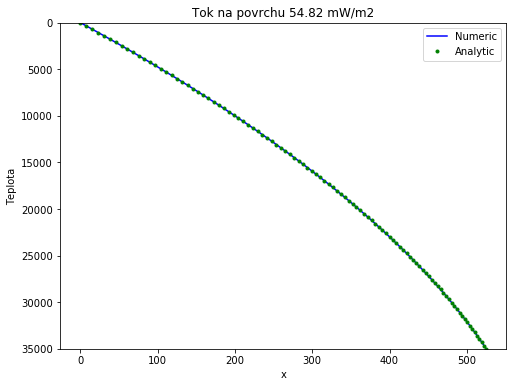

In [9]:
plot(t, x, 'b', label='Numeric')
plot(ta, x, 'g.', label='Analytic')
ylim(tc, 0)
legend()
xlabel('x')
ylabel('Teplota')
title('Tok na povrchu {:.2f} mW/m2'.format(1000 * k * (t[1] - t[0]) / dx));